<!-- # Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
  -->

In [52]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import sem
import scipy.stats as stats

# # Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# # Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single DataFrame
complete_df =pd.merge(study_results,mouse_metadata, on="Mouse ID",how='inner')

# # Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# # Checking the number of mice.
number_mice = len(complete_df["Mouse ID"].value_counts())
number_mice

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_id = complete_df.loc[complete_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID.
study_results[study_results['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = complete_df[complete_df["Mouse ID"].isin(duplicate_mouse_id)==False]
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.

len(mouse_clean["Mouse ID"].value_counts())-1

247

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#JB use .groupby to select the right columns and calculate the statisticals
tumor_summary = mouse_clean.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean","median","var","std","sem"]}
)
#Add Stadard Error of the Mean separately using .apply.
tumor_sem = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(sem)
tumor_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [32]:
#SKIPPED SEE ABOVE CELL
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# tumor_sum_single_line = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

# tumor_summary["Tumor_Volume_Sem"] = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(lambda x: sem(x))

# tumor_sum_single_line 


<!-- ## Bar and Pie Charts -->

<function matplotlib.pyplot.show(close=None, block=None)>

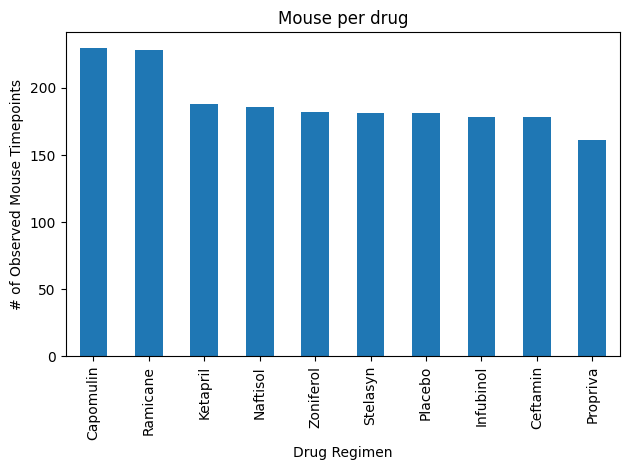

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group de data we want to plot and count how often it occurs
drug_counts =complete_df["Drug Regimen"].value_counts()

#match the colors of the bar:
baby_blue = "#1f77b4" 
#Initiate the bar plot
drug_counts.plot(kind = 'bar', color = baby_blue, alpha=1)

#Format the chart
plt.title("Mouse per drug")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show

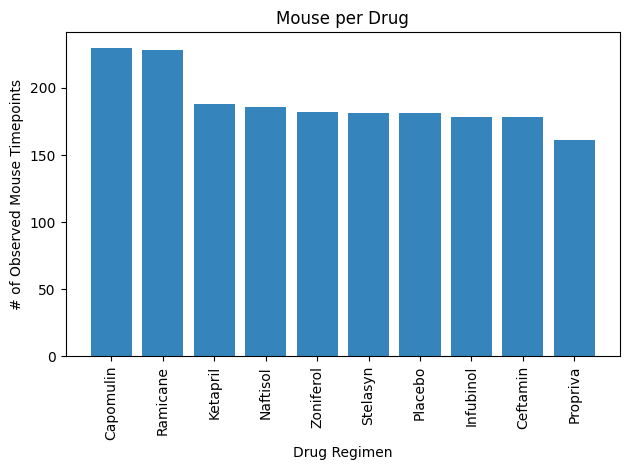

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group de data we want to plot and count how often it occurs
drug_counts = complete_df["Drug Regimen"].value_counts()

#match the colors of the bar:
baby_blue = "#1f77b4" 

#Create bar chart with plt.bar
plt.bar(drug_counts.index,drug_counts.values, color= baby_blue, alpha=0.9)

#format the chart
plt.title("Mouse per Drug") ### SHOULD I LEAVE THIS OUT?
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

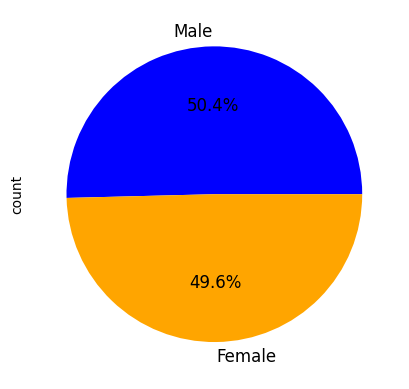

In [35]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_sex = mouse_clean.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
count = mice_sex.Sex.value_counts()


# Make the pie chart
# Set Pie Colors
count.plot.pie(
    autopct="%1.1f%%",
    colors = ["blue","orange"],
    fontsize=12,
)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

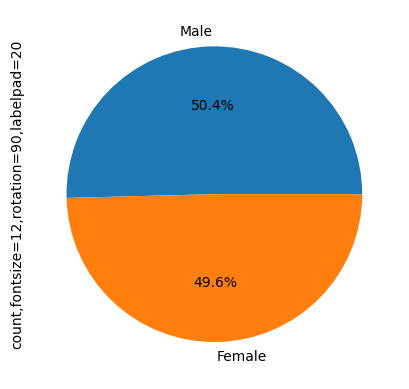

In [36]:
#JB off by 0.2!!!!!
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_sex = mouse_clean.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
count = mice_sex.Sex.value_counts()

# Make the pie chart
# Set Pie Colors
colors= ["blue","pink"]
plt.pie(count, labels=count.index, autopct="%1.1f%%")
plt.ylabel("count,fontsize=12,rotation=90,labelpad=20")

plt.show



<!-- ## Quartiles, Outliers and Boxplots -->

In [37]:
complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_clean.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
 
last_merged_df = last_timepoint.merge(mouse_clean, on=["Mouse ID", "Timepoint"], how = 'left')
                    #  left_on = ['Mouse ID','Timepoint'])

In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

#     Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    subset = last_merged_df.loc[last_merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

#     add subset
    tumor_volume.append(subset)

#      Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.50,.75])

    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]

    IQR = Q3-Q1

    lower_bounds = Q1 - (1.5 * IQR)
    upper_bounds = Q3 + (1.5 * IQR)
    outliers = subset.loc[(subset < lower_bounds) | (subset > upper_bounds)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/lb/dhx4wjdj231373zjhtdpwytc0000gn/T/ipykernel_6744/1167769473.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume, labels= treatments,flierprops={


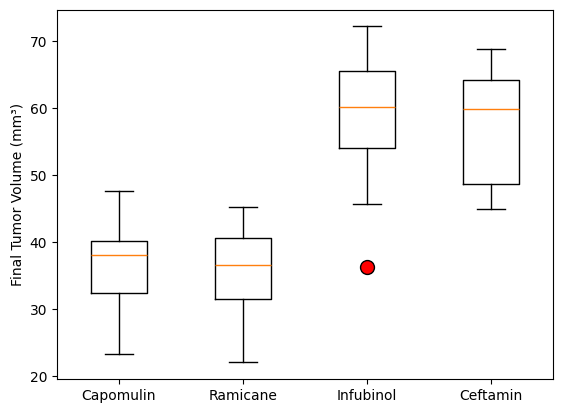

In [40]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume, labels= treatments,flierprops={
    'markerfacecolor':'red',
    'markersize': 10
    })
# plt.title()
# plt.xlabel(treatments)
# plt.ylabel(outliers)
plt.ylabel("Final Tumor Volume (mm³)", fontsize=10, fontweight='regular')
plt.show()

<!-- ## Line and Scatter Plots -->

In [41]:
# Find the mouse shown in the solution(mouse 1509)
mouse_id = '1509'
mouse_meta_row = mouse_metadata[mouse_metadata["Mouse ID"] == mouse_id]
print(mouse_meta_row)

mouse_id = '1509'
mouse_study_row = study_results[study_results["Mouse ID"] == mouse_id]
print(mouse_study_row)


# CONLUSION: THERE IS NO MOUSE ID 1509 IIN THIS DATA SET. I'LL PICK A RANDOM MOUSE THAT IS TREATED WITH Capomulin

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [42]:
#picking a mouse: Sort latest_merged_df so that I see all mice treated with Capomulin and pick a mouse ID.
capomulin_df = last_merged_df[last_merged_df["Drug Regimen"]=="Capomulin"]
capomulin_df
# I'm selecting mouse i557 because it has the most amount of tumors.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


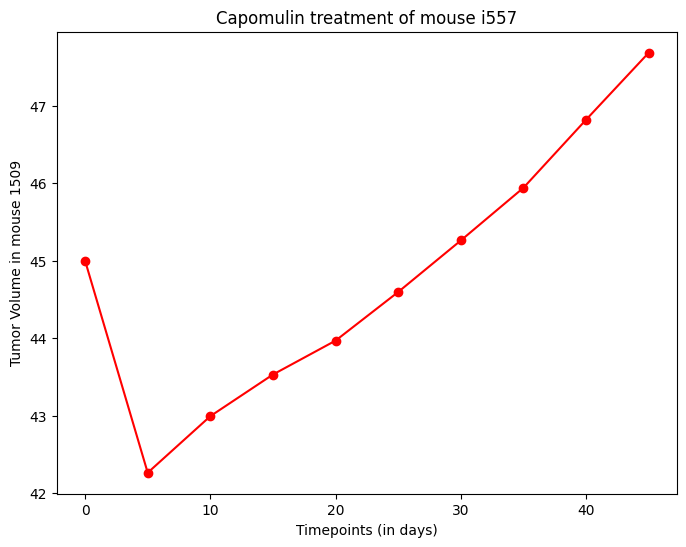

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#JB isolating the data of the selected mouse i557.
mouse_data = complete_df.loc[complete_df["Mouse ID"] == 'i557']

#JB sort to make ready for a time-serie chart.
mouse_data = mouse_data.sort_values(by='Timepoint')

#plot the line chart
plt.figure(figsize=(8,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle ='-', color = 'r')
plt.xlabel('Timepoints (in days)')
plt.ylabel(f'Tumor Volume in mouse {mouse_id}')
plt.title("Capomulin treatment of mouse i557")
plt.show()


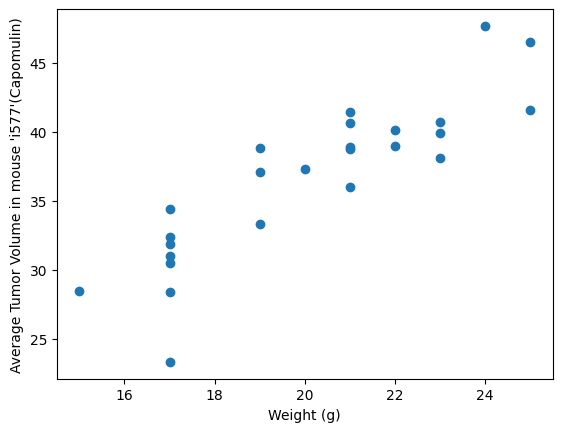

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.scatter(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'], marker="o")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume in mouse 'i577'(Capomulin)")
plt.show()


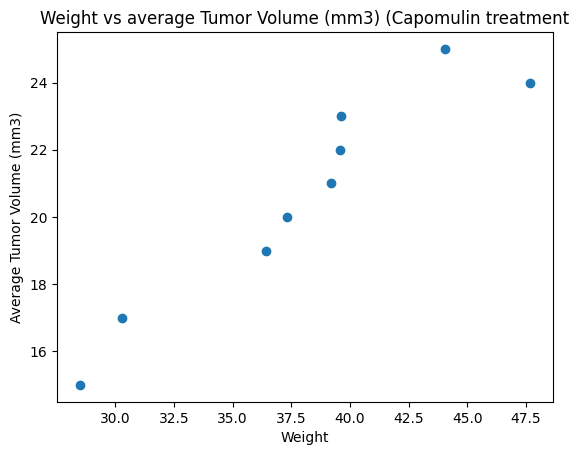

In [62]:
#Not sure if I had to calculate the average of the tumor volume and graph that, so here that is.
avg_tumor_vol = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

plt.scatter(avg_tumor_vol['Tumor Volume (mm3)'],avg_tumor_vol['Weight (g)'], marker = "o")

plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Weight vs average Tumor Volume (mm3) (Capomulin treatment")
plt.show()

<!-- ## Correlation and Regression -->

This is the correlation coefficient between weigth and tumor volume: 0.95


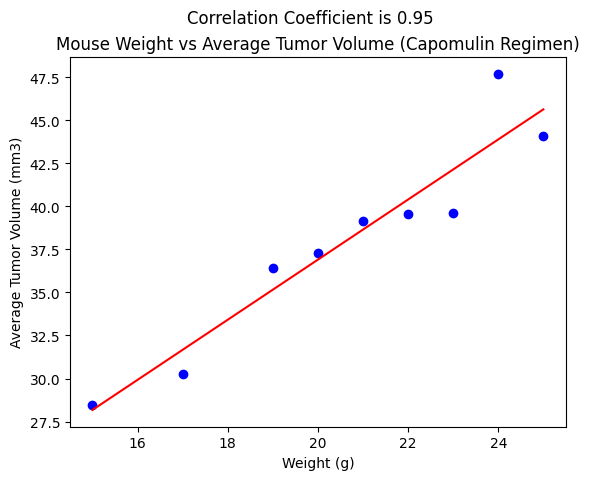

In [59]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#group data by "weight (9)"  and calculate the mean.
avg_tumor_vol = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']

# Calculate correlation coefficient
correlation = avg_tumor_vol['Weight (g)'].corr(avg_tumor_vol['Tumor Volume (mm3)'])

print(f"This is the correlation coefficient between weigth and tumor volume: {correlation:.2f}")

#Perform regression line

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)


#Create regression line
regression_line = slope *x_values + intercept

#plot scatter plot
plt.scatter(x_values,y_values, label="data", color="blue", marker= 'o')

#plot regression line
plt.plot(x_values,regression_line, color="red", label = f"y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.suptitle(f"Correlation Coefficient is {correlation:.2f}")
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)')


plt.show()